In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import numpy as np


df = pd.read_csv('./data.csv', names=["id", "image", "published", "disabled"], header=None)

In [4]:
df.loc[4998:5010, :]

,id,image,published,disabled
4998,5b59247bb41408f61fb8b880,https://scontent.cdninstagram.com/vp/eed1fc6b8...,1,0
4999,5b590d950b05faed6243bb72,https://scontent.cdninstagram.com/vp/00fb705f3...,1,0
5000,5e583384bd0865d78898f887,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,0,1
5001,5e58219fea00ddd33e78f3f9,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,0,1
5002,5e58219fc75efed33d9deb74,https://scontent.xx.fbcdn.net/v/t51.2885-15/88...,0,1
5003,5e58219fc75efed33d9deb75,https://scontent.xx.fbcdn.net/v/t51.2885-15/84...,0,1
5004,5e57dba39e88b6be2ac42676,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,0,1
5005,5e57cb03dcbcc5b829230fa1,https://scontent.xx.fbcdn.net/v/t51.2885-15/87...,0,1
5006,5e57ba729b133db40fbc5b16,https://scontent.xx.fbcdn.net/v/t51.2885-15/88...,0,1
5007,5e57b5eaf23316b1e31125c1,https://scontent.xx.fbcdn.net/v/t51.2885-15/85...,0,1


In [6]:
import glob

len(list(glob.glob('data/all_images/*.jpg')))

8339

saved ./data/all_images3/5e5836fee917e8d9a8a7b277.jpg
saved ./data/all_images3/5e58343ded065ad79e312f3d.jpg
saved ./data/all_images3/5e57dc939e88b6be2ac42800.jpg
saved ./data/all_images3/5e55dca437fa5927dcdf02f3.jpg
saved ./data/all_images3/5e55d69eb9e5b725cd7ba02f.jpg
saved ./data/all_images3/5e55ca8d0f1aeb23b862f240.jpg
saved ./data/all_images3/5e55a83c75d14b7257d1aceb.jpg
saved ./data/all_images3/5e55a64975d14b7257b6bb57.jpg
saved ./data/all_images3/5e55a3e657f15e175b8fa58f.jpg
saved ./data/all_images3/5e5599177b167515233a3e77.jpg


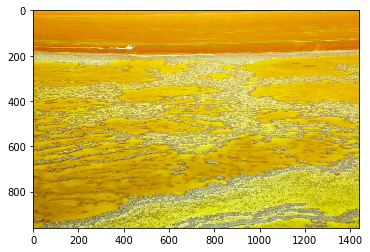

In [20]:
import os
import urllib.request 
from PIL import Image
from shutil import copyfile


base_dir = './data'
os.makedirs(base_dir, exist_ok=True)

all_images_dir = os.path.join(base_dir, 'all_images')
os.makedirs(all_images_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)



def save_image(all_image_folder, dest_folder, _id, url, label):
    all_image_file = os.path.join(all_image_folder, _id + '.jpg')
    empty_image_file = os.path.join(all_image_folder, _id)
    dest_path = os.path.join(dest_folder, label)
    dest_file = os.path.join(dest_path, _id + '.jpg')

    # check image file already exists
    if os.path.isfile(all_image_file):
        copyfile(all_image_file, dest_file)
        return 
    
    # check empty file already exists
    if os.path.isfile(empty_image_file):
        return

    
    # create dest_path
    if not os.path.exists(dest_path):
        os.makedirs(dest_path, exist_ok=True)
    
    
    tmp_file = os.path.join(all_image_folder, _id + '.tmp')
    try:        
        with urllib.request.urlopen(url, timeout=5) as response:
            info = response.info()
            mime_type = info.get_content_type()

            ext = ''
            if mime_type == 'image/png':
                ext = 'png'
            elif mime_type == 'image/jpeg':
                ext = 'jpg'                

            assert(ext)
                        
            # save request to file
            f = open(tmp_file, 'wb')
            f.write(response.read())
            f.close()


            im = Image.open(tmp_file)
            
            # validate image
            np_image = np.array(im)            
            assert(len(np_image.shape) == 3 and np_image.shape[2] == 3)

            # convert image to RGB
            rgb_im = im.convert('RGB')
            rgb_im.save(all_image_file)

            copyfile(all_image_file, dest_file)

            print('saved {}'.format(all_image_file))    
            
    except Exception as e:
        # create empty file
        print('saved empty file {}'.format(empty_image_file))
        open(empty_image_file, 'a').close()
        print(_id, str(e))
        
    if os.path.exists(tmp_file):
        os.remove(tmp_file)
                
        
        

def save_images(source_folder, dest_folder, data, size=None):
    if not size:
        size = len(data)
        
    c = 0    
    for i, row in data.iterrows():
        _id = row['id']
        url = row['image']
        label = 'published' if row['published'] else 'disabled'
        c += 1
        
        # download image
        save_image(source_folder, dest_folder, _id, url, label)
            
        if c % 100 == 0:
            print('Completed', c)
            
        if c >= size:
            break

    return c

save_images(all_images_dir,train_dir, df, 10)


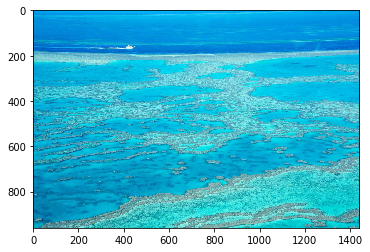

In [35]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
%matplotlib inline

sample_image = 'data/all_images2/5e5836fee917e8d9a8a7b277.jpg'
# img = cv2.imread(sample_image)
# print(img.shape)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
# plt.imshow(img)

img2 = mpimg.imread(sample_image)
plt.imshow(img2)


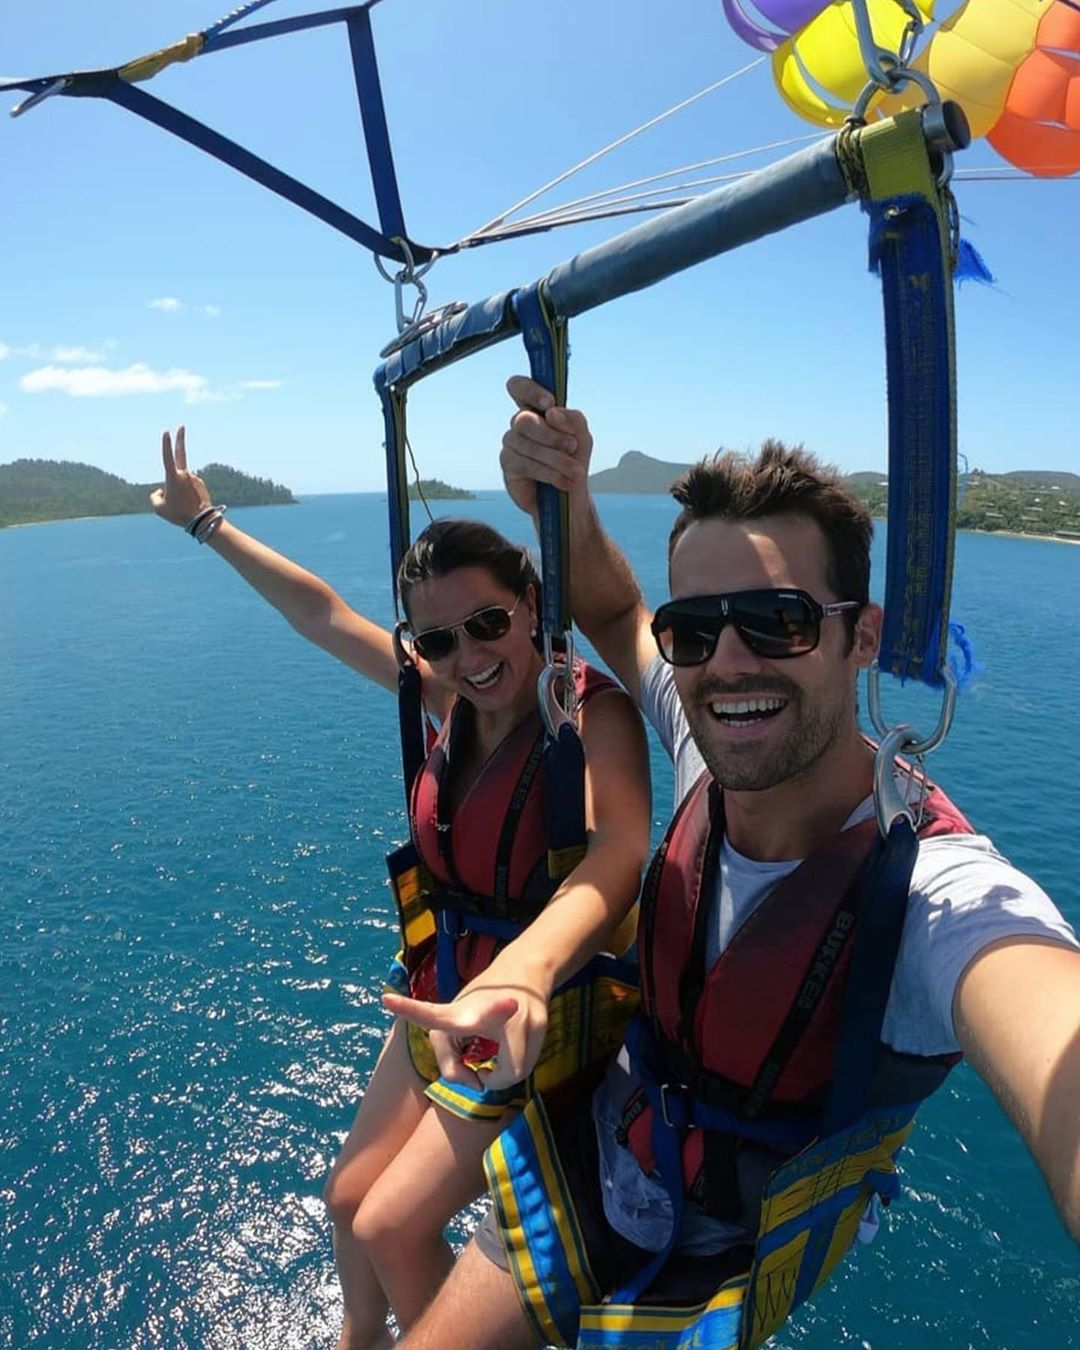

In [23]:
import IPython

IPython.display.Image(filename='../test.jpg')
